## Computations for the first model (first EKF)

In [1]:
import sympy as sp

# Définition des variables symboliques
x1, x2, x3, x4, x5, x6, x7, x8, x9 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9')
L, M, m, g, Ixx, Iyy, Izz, LS, r = sp.symbols('L M m g I_{xx} I_{yy} I_{zz} L_S r')
Cmx, Cmy, Cmz = sp.symbols('C_{mx} C_{my} C_{mz}')

# Définition de f
f1 = x4
f2 = x5
f3 = x6
f4 = (2*L**2*sp.cos(x2)*sp.sin(x2)*x4*x5 +
      (M + m/2)*L*g*sp.cos(x2)*sp.sin(x1) + Cmx)/(Ixx + L**2*sp.cos(x2)**2*(M + m/4))
f5 = ((M + m/2)*L*g*sp.cos(x1)*sp.sin(x2) + Cmy)/(Iyy + L**2*(M + m/4))
f6 = Cmz/Izz

# Définition de f sous forme de vecteur
f = sp.Matrix([f1, f2, f3, f4, f5, f6])

# Définition de la matrice jacobienne de f par rapport à x1, x2, x3, x4, x5, x6
J = f.jacobian([x1, x2, x3, x4, x5, x6])

# Définition de la matrice jacobienne de f par rapport à Cmx, Cmy, Cmz
K = f.jacobian([Cmx, Cmy, Cmz])
print(K)

Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0], [1/(I_{xx} + L**2*(M + m/4)*cos(x2)**2), 0, 0], [0, 1/(I_{yy} + L**2*(M + m/4)), 0], [0, 0, 1/I_{zz}]])


In [2]:
file = open("jacobian_gyro.txt", "w")


for i in range(6):
    for j in range(6):
        Jij = sp.sympify(J[i, j])
        file.write("\\frac{\partial f_" + str(i+1) + "}{\partial x_" + str(j+1) + "}" + "&= {}\\\\\n".format(sp.latex(Jij)))

file.close()

file = open("jacobian_gyro_cmd.txt", "w")

List = ["mx", "my", "mz"]
for i in range(6):
    for j in range(3):
        Kij = sp.sympify(K[i, j])
        file.write("\\frac{\partial f_" + str(i+1) + "}{\partial C_" + "{"+ List[j] + "}" + "}" + "&= {}\\\\\n".format(sp.latex(Kij)))
file.close()

$$\begin{align*}\frac{\partial f_1}{\partial x_1}&= 0\\
\frac{\partial f_1}{\partial x_2}&= 0\\
\frac{\partial f_1}{\partial x_3}&= 0\\
\frac{\partial f_1}{\partial x_4}&= 1\\
\frac{\partial f_1}{\partial x_5}&= 0\\
\frac{\partial f_1}{\partial x_6}&= 0\\
\frac{\partial f_2}{\partial x_1}&= 0\\
\frac{\partial f_2}{\partial x_2}&= 0\\
\frac{\partial f_2}{\partial x_3}&= 0\\
\frac{\partial f_2}{\partial x_4}&= 0\\
\frac{\partial f_2}{\partial x_5}&= 1\\
\frac{\partial f_2}{\partial x_6}&= 0\\
\frac{\partial f_3}{\partial x_1}&= 0\\
\frac{\partial f_3}{\partial x_2}&= 0\\
\frac{\partial f_3}{\partial x_3}&= 0\\
\frac{\partial f_3}{\partial x_4}&= 0\\
\frac{\partial f_3}{\partial x_5}&= 0\\
\frac{\partial f_3}{\partial x_6}&= 1\\
\frac{\partial f_4}{\partial x_1}&= \frac{L g \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_4}{\partial x_2}&= \frac{2 L^{2} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} \\&+ \frac{- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_4}{\partial x_3}&= 0\\
\frac{\partial f_4}{\partial x_4}&= \frac{2 L^{2} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_4}{\partial x_5}&= \frac{2 L^{2} x_{4} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_4}{\partial x_6}&= 0\\
\frac{\partial f_5}{\partial x_1}&= - \frac{L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_5}{\partial x_2}&= \frac{L g \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_5}{\partial x_3}&= 0\\
\frac{\partial f_5}{\partial x_4}&= 0\\
\frac{\partial f_5}{\partial x_5}&= 0\\
\frac{\partial f_5}{\partial x_6}&= 0\\
\frac{\partial f_6}{\partial x_1}&= 0\\
\frac{\partial f_6}{\partial x_2}&= 0\\
\frac{\partial f_6}{\partial x_3}&= 0\\
\frac{\partial f_6}{\partial x_4}&= 0\\
\frac{\partial f_6}{\partial x_5}&= 0\\
\frac{\partial f_6}{\partial x_6}&= 0
\end{align*}$$


$$\begin{align*}
\frac{\partial f_1}{\partial C_{mx}}&= 0\\
\frac{\partial f_1}{\partial C_{my}}&= 0\\
\frac{\partial f_1}{\partial C_{mz}}&= 0\\
\frac{\partial f_2}{\partial C_{mx}}&= 0\\
\frac{\partial f_2}{\partial C_{my}}&= 0\\
\frac{\partial f_2}{\partial C_{mz}}&= 0\\
\frac{\partial f_3}{\partial C_{mx}}&= 0\\
\frac{\partial f_3}{\partial C_{my}}&= 0\\
\frac{\partial f_3}{\partial C_{mz}}&= 0\\
\frac{\partial f_4}{\partial C_{mx}}&= \frac{1}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_4}{\partial C_{my}}&= 0\\
\frac{\partial f_4}{\partial C_{mz}}&= 0\\
\frac{\partial f_5}{\partial C_{mx}}&= 0\\
\frac{\partial f_5}{\partial C_{my}}&= \frac{1}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_5}{\partial C_{mz}}&= 0\\
\frac{\partial f_6}{\partial C_{mx}}&= 0\\
\frac{\partial f_6}{\partial C_{my}}&= 0\\
\frac{\partial f_6}{\partial C_{mz}}&= \frac{1}{I_{zz}}
\end{align*}$$

# Approximation of the exponential

Let $\text{exp}_n$ the rounded serie of the exponential function :

$$\text{exp}_n(a) = \sum_{i=0}^n \frac{a^k}{k!}$$

We will always take $n$ even and we will study the following approximation $e^a \approx \frac{1}{\text{exp}_n(-a)}$ that can be a good choice for the approximation of $e^x$ with $x<0$ and relatively well for little positive $x$.



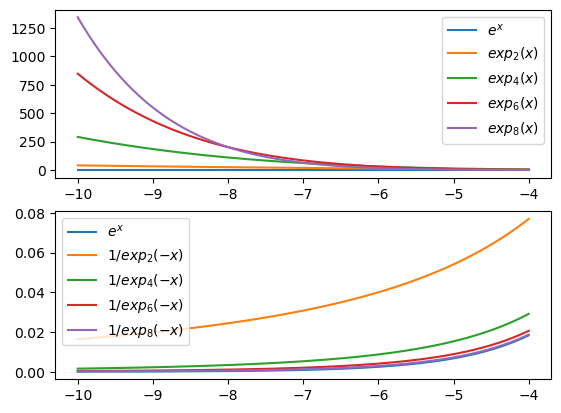

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# scalar case
def expn(x, n):
    factorials = np.arange(0, n+1)
    factorials[0] = 1
    factorials = np.cumprod(factorials).reshape((n+1, 1))
    xs = x.reshape((1, x.size)) + np.zeros((n+1, 1))
    xs[0, :] = np.ones(x.size)
    xk = np.cumprod(xs, axis = 0)
    return np.sum(xk/factorials, axis=0)

def approx_exp(x, n):
    return 1/expn(-x, n)

x = np.linspace(-10, -4, 500)
n = 8

plt.subplots(2, 1)
plt.subplot(2, 1, 1)

plt.plot(x, np.exp(x), label = "$e^x$")
for n in [2*i for i in range(1, 5)]:
    plt.plot(x, expn(x, n), label = "$exp_{" + str(n) + "}(x)$")
plt.legend()
plt.subplot(2, 1, 2)

plt.plot(x, np.exp(x), label = "$e^x$")
for n in [2*i for i in range(1, 5)]:
    plt.plot(x, approx_exp(x, n), label = "$1/exp_{" + str(n) + "}(-x)$")
plt.legend()


This approximation is interesting only for negative hermitian matrices, we will use first/second order approximations those are enough accurate for our model

## State model for angular and linear velocities and accelerations

In this section we will compute the jacobians for the state model with the state variable $\bm{x} = (\bm{\theta} ~ \dot{\bm{\theta}} ~ \dot{\bm{v}})^T$

$$\dot{\bm{x}} = \begin{pmatrix}\dot{\bm{\theta}}\\ \ddot{\bm{\theta}} \\ \ddot{\bm{v}}\end{pmatrix} = \begin{pmatrix}\\ \bm{f}(\bm{\theta}, \dot{\bm{\theta}})\\ \\ \bm{R}_{\text{sen,rod}}\left(\bm{R}_{\text{rod, 0}}(\bm{\theta})\dot{\bm{\theta}}^{\times} + (\dot{\bm{\theta}}^{\times})^3 + 2\dot{\bm{\theta}}^{\times}\ddot{\bm{\theta}}^{\times} + \ddot{\bm{\theta}}^{\times}\dot{\bm{\theta}}^{\times} + \dot{\ddot{\bm{\theta}}}^{\times}\right)\begin{pmatrix}0 \\ r \\ -L_S\end{pmatrix}\end{pmatrix}$$

with the output : 
$$\bm{y} =\bm{x}$$

In [4]:

def fdottheta(x1, x2, x3, x4, x5, x6):
    f4 = (2*L**2*sp.cos(x2)*sp.sin(x2)*x4*x5 +
        (M + m/2)*L*g*sp.cos(x2)*sp.sin(x1) + Cmx)/(Ixx + L**2*sp.cos(x2)**2*(M + m/4))
    f5 = ((M + m/2)*L*g*sp.cos(x1)*sp.sin(x2) + Cmy)/(Iyy + L**2*(M + m/4))
    f6 = Cmz/Izz
    return [f4, f5, f6]
def Rsr():
    return sp.Matrix([[-1, 0, 0],
                      [0, 0, -1],
                      [0, -1, 0]])
def Rx(x1):
    return sp.Matrix([[1, 0, 0],
                      [0, sp.cos(x1), -sp.sin(x1)],
                      [0, sp.sin(x1), sp.cos(x1)]])
def Ry(x2):
    return sp.Matrix([[sp.cos(x2), 0, sp.sin(x2)],
                      [0, 0, 0],
                      [-sp.sin(x2), 0, sp.cos(x2)]])
def Rz(x3):
    return sp.Matrix([[sp.cos(x3), -sp.sin(x3), 0],
                      [sp.sin(x3), sp.cos(x3),0],
                      [0, 0, 1]])
def R0rod(x1, x2, x3):
    return Rx(x1)@Ry(x2)@Rz(x3)

def cross_product(theta1, theta2, theta3):
    return sp.Matrix([[0, -theta3, theta2],
                      [theta3, 0, -theta1],
                      [-theta2, theta1, 0]])

def k(x1, x2, x3, x4, x5, x6, x7, x8, x9):
    ddtheta = fdottheta(x1, x2, x3, x4, x5, x6)
    dddtheta = fdottheta(x4, x5, x6, ddtheta[0], ddtheta[1], ddtheta[2])
    cross_dtheta = cross_product(x4, x5, x6)
    cross_ddtheta = cross_product(ddtheta[0], ddtheta[1], ddtheta[2])
    cross_dddtheta = cross_product(dddtheta[0], dddtheta[1], dddtheta[2])
    k123 = Rsr()@(R0rod(x1, x2, x3).T @ cross_dtheta + cross_dtheta@cross_dtheta@cross_dtheta + 2*cross_dtheta @ cross_ddtheta + cross_ddtheta @ cross_dtheta + cross_dddtheta)@sp.Matrix([[0], [r], [-LS]])
    return [k123[0], k123[1], k123[2]]

kx = k(x1, x2, x3, x4, x5, x6, x7, x8, x9)
fk = sp.Matrix([f1, f2, f3, f4, f5, f6, kx[0], kx[1], kx[2]])
JJ = fk.jacobian([x1, x2, x3, x4, x5, x6, x7, x8, x9])
KK = fk.jacobian([Cmx, Cmy, Cmz])

In [5]:
file = open("jacobian_acc_gyro.txt", "w")


for i in range(9):
    for j in range(9):
        Jij = sp.sympify(JJ[i, j])
        file.write("\\frac{\partial f_" + "{" + str(i+1) + "}" + "}{\partial x_" + "{" + str(j+1) + "}" + "}" + "&= {}\\\\\n".format(sp.latex(Jij)))

file.close()

file = open("jacobian_acc_gyr_cmd.txt", "w")

List = ["mx", "my", "mz"]
for i in range(9):
    for j in range(3):
        Kij = sp.sympify(KK[i, j])
        file.write("\\frac{\partial f_" + "{" + str(i+1) +"}" + "}{\partial C_" + "{"+ List[j] + "}" + "}" + "&= {}\\\\\n".format(sp.latex(Kij)))
file.close()

$$\begin{align*}
\frac{\partial f_{1}}{\partial x_{1}}&= 0\\
\frac{\partial f_{1}}{\partial x_{2}}&= 0\\
\frac{\partial f_{1}}{\partial x_{3}}&= 0\\
\frac{\partial f_{1}}{\partial x_{4}}&= 1\\
\frac{\partial f_{1}}{\partial x_{5}}&= 0\\
\frac{\partial f_{1}}{\partial x_{6}}&= 0\\
\frac{\partial f_{1}}{\partial x_{7}}&= 0\\
\frac{\partial f_{1}}{\partial x_{8}}&= 0\\
\frac{\partial f_{1}}{\partial x_{9}}&= 0\\
\frac{\partial f_{2}}{\partial x_{1}}&= 0\\
\frac{\partial f_{2}}{\partial x_{2}}&= 0\\
\frac{\partial f_{2}}{\partial x_{3}}&= 0\\
\frac{\partial f_{2}}{\partial x_{4}}&= 0\\
\frac{\partial f_{2}}{\partial x_{5}}&= 1\\
\frac{\partial f_{2}}{\partial x_{6}}&= 0\\
\frac{\partial f_{2}}{\partial x_{7}}&= 0\\
\frac{\partial f_{2}}{\partial x_{8}}&= 0\\
\frac{\partial f_{2}}{\partial x_{9}}&= 0\\
\frac{\partial f_{3}}{\partial x_{1}}&= 0\\
\frac{\partial f_{3}}{\partial x_{2}}&= 0\\
\frac{\partial f_{3}}{\partial x_{3}}&= 0\\
\frac{\partial f_{3}}{\partial x_{4}}&= 0\\
\frac{\partial f_{3}}{\partial x_{5}}&= 0\\
\frac{\partial f_{3}}{\partial x_{6}}&= 1\\
\frac{\partial f_{3}}{\partial x_{7}}&= 0\\
\frac{\partial f_{3}}{\partial x_{8}}&= 0\\
\frac{\partial f_{3}}{\partial x_{9}}&= 0\\
\frac{\partial f_{4}}{\partial x_{1}}&= \frac{L g \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{4}}{\partial x_{2}}&= \frac{2 L^{2} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} + \frac{- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{4}}{\partial x_{3}}&= 0\\
\frac{\partial f_{4}}{\partial x_{4}}&= \frac{2 L^{2} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{4}}{\partial x_{5}}&= \frac{2 L^{2} x_{4} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{4}}{\partial x_{6}}&= 0\\
\frac{\partial f_{4}}{\partial x_{7}}&= 0\\
\frac{\partial f_{4}}{\partial x_{8}}&= 0\\
\frac{\partial f_{4}}{\partial x_{9}}&= 0\\
\frac{\partial f_{5}}{\partial x_{1}}&= - \frac{L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_{5}}{\partial x_{2}}&= \frac{L g \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_{5}}{\partial x_{3}}&= 0\\
\frac{\partial f_{5}}{\partial x_{4}}&= 0\\
\frac{\partial f_{5}}{\partial x_{5}}&= 0\\
\frac{\partial f_{5}}{\partial x_{6}}&= 0\\
\frac{\partial f_{5}}{\partial x_{7}}&= 0\\
\frac{\partial f_{5}}{\partial x_{8}}&= 0\\
\frac{\partial f_{5}}{\partial x_{9}}&= 0\\
\frac{\partial f_{6}}{\partial x_{1}}&= 0\\
\frac{\partial f_{6}}{\partial x_{2}}&= 0\\
\frac{\partial f_{6}}{\partial x_{3}}&= 0\\
\frac{\partial f_{6}}{\partial x_{4}}&= 0\\
\frac{\partial f_{6}}{\partial x_{5}}&= 0\\
\frac{\partial f_{6}}{\partial x_{6}}&= 0\\
\frac{\partial f_{6}}{\partial x_{7}}&= 0\\
\frac{\partial f_{6}}{\partial x_{8}}&= 0\\
\frac{\partial f_{6}}{\partial x_{9}}&= 0\\
\frac{\partial f_{7}}{\partial x_{1}}&= - L_{S} \left(- \frac{2 L g x_{6} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} + x_{4} \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{3} \right)}\right) + r \left(\frac{L g x_{4} \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - \frac{2 L g x_{5} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right)\\
\frac{\partial f_{7}}{\partial x_{2}}&= - L_{S} \left(- \frac{4 L^{2} x_{6} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} + x_{4} \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)} + x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{3} \right)} - \frac{2 x_{6} \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\right) + r \left(- \frac{4 L^{2} x_{5} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} - \frac{L g x_{4} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + x_{4} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)} - \frac{2 x_{5} \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - x_{6} \sin{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right)\\
\frac{\partial f_{7}}{\partial x_{3}}&= - L_{S} \left(- x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} + x_{5} \sin{\left(x_{3} \right)} \cos{\left(x_{2} \right)}\right) + r \left(- x_{4} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} \cos{\left(x_{1} \right)} - x_{6} \sin{\left(x_{3} \right)} \cos{\left(x_{2} \right)}\right)\\
\frac{\partial f_{7}}{\partial x_{4}}&= - L_{S} \left(- \frac{C_{mz}}{I_{zz}} - \frac{4 L^{2} x_{5} x_{6} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} + \frac{L g \left(M + \frac{m}{2}\right) \sin{\left(x_{4} \right)} \sin{\left(x_{5} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + 2 x_{4} x_{5} + \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right) + r \left(- \frac{4 L^{2} x_{5}^{2} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - 2 x_{4} x_{6} - \frac{C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{3} \right)}\right)\\
\frac{\partial f_{7}}{\partial x_{5}}&= - L_{S} \left(- \frac{4 L^{2} x_{4} x_{6} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \frac{L g \left(M + \frac{m}{2}\right) \cos{\left(x_{4} \right)} \cos{\left(x_{5} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + x_{4}^{2} + 3 x_{5}^{2} + x_{6}^{2} - \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right) + r \left(- \frac{4 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - 2 x_{5} x_{6} - \frac{2 \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\right)\\
\frac{\partial f_{7}}{\partial x_{6}}&= - L_{S} \left(2 x_{5} x_{6} - \frac{2 \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\right) + r \left(- x_{4}^{2} - x_{5}^{2} - 3 x_{6}^{2} + \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right)\\
\frac{\partial f_{7}}{\partial x_{7}}&= 0\\
\frac{\partial f_{7}}{\partial x_{8}}&= 0\\
\frac{\partial f_{7}}{\partial x_{9}}&= 0\\
\frac{\partial f_{8}}{\partial x_{1}}&= - L_{S} \left(\frac{3 L g x_{4} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \frac{3 L g x_{5} \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - x_{4} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) + r \left(\frac{L g x_{6} \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + x_{4} \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)} - \frac{\frac{2 L^{3} g \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(M + \frac{m}{2}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{2 L^{3} g \left(M + \frac{m}{2}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right)\\
\frac{\partial f_{8}}{\partial x_{2}}&= - L_{S} \left(\frac{6 L^{2} x_{4} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} + \frac{3 L g x_{5} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} + \frac{3 x_{4} \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - x_{5} \cos{\left(x_{2} \right)}\right) + r \left(- \frac{L g x_{6} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + x_{4} \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)} + x_{6} \cos{\left(x_{2} \right)} - \frac{\frac{4 L^{4} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2} \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{3} g \left(M + \frac{m}{2}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right)\\
\frac{\partial f_{8}}{\partial x_{3}}&= 0\\
\frac{\partial f_{8}}{\partial x_{4}}&= - L_{S} \left(\frac{6 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)} + \frac{3 \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\right) + r \left(3 x_{4}^{2} + x_{5}^{2} + x_{6}^{2} - \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} - \frac{\frac{4 L^{4} x_{5} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + L g \left(M + \frac{m}{2}\right) \cos{\left(x_{4} \right)} \cos{\left(x_{5} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right)\\
\frac{\partial f_{8}}{\partial x_{5}}&= - L_{S} \left(\frac{6 L^{2} x_{4}^{2} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} + \frac{3 \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right)}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - \sin{\left(x_{2} \right)}\right) + r \left(- \frac{2 C_{mz}}{I_{zz}} - \frac{2 L^{2} \left(M + \frac{m}{4}\right) \left(C_{mx} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{4} \right)} \cos{\left(x_{5} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}\right)^{2}} + 2 x_{4} x_{5} - \frac{\frac{4 L^{4} x_{4} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin^{2}{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \cos^{2}{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{4} \right)} \sin{\left(x_{5} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right)\\
\frac{\partial f_{8}}{\partial x_{6}}&= r \left(2 x_{4} x_{6} - \frac{C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + \sin{\left(x_{2} \right)}\right)\\
\frac{\partial f_{8}}{\partial x_{7}}&= 0\\
\frac{\partial f_{8}}{\partial x_{8}}&= 0\\
\frac{\partial f_{8}}{\partial x_{9}}&= 0\\
\frac{\partial f_{9}}{\partial x_{1}}&= - L_{S} \left(\frac{2 L g x_{6} \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - x_{4} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} \cos{\left(x_{1} \right)} + \frac{\frac{2 L^{3} g \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(M + \frac{m}{2}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{2 L^{3} g \left(M + \frac{m}{2}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right) + r \left(\frac{3 L g x_{4} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} + x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)}\right)\\
\frac{\partial f_{9}}{\partial x_{2}}&= - L_{S} \left(- \frac{2 L g x_{6} \left(M + \frac{m}{2}\right) \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{3} \right)} \cos{\left(x_{2} \right)} - x_{5} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} + \frac{\frac{4 L^{4} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2} \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{3} g \left(M + \frac{m}{2}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right) + r \left(\frac{6 L^{2} x_{4} \left(M + \frac{m}{4}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right)^{2}} - x_{4} \sin{\left(x_{3} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{2} \right)} + \frac{3 x_{4} \left(- 2 L^{2} x_{4} x_{5} \sin^{2}{\left(x_{2} \right)} + 2 L^{2} x_{4} x_{5} \cos^{2}{\left(x_{2} \right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} + x_{6} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)}\right)\\
\frac{\partial f_{9}}{\partial x_{3}}&= - L_{S} \left(- x_{4} \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \cos{\left(x_{3} \right)} + x_{5} \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right) + r \left(- x_{4} \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)} \cos{\left(x_{3} \right)} - x_{6} \cos{\left(x_{2} \right)} \cos{\left(x_{3} \right)}\right)\\
\frac{\partial f_{9}}{\partial x_{4}}&= - L_{S} \left(- 3 x_{4}^{2} - x_{5}^{2} - x_{6}^{2} - \sin{\left(x_{1} \right)} \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} + \frac{\frac{4 L^{4} x_{5} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + L g \left(M + \frac{m}{2}\right) \cos{\left(x_{4} \right)} \cos{\left(x_{5} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right) + r \left(\frac{6 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \sin{\left(x_{2} \right)} \sin{\left(x_{3} \right)} \cos{\left(x_{1} \right)} + \frac{3 \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\right)\\
\frac{\partial f_{9}}{\partial x_{5}}&= \frac{6 L^{2} r x_{4}^{2} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - L_{S} \left(- \frac{C_{mz}}{I_{zz}} + \frac{2 L^{2} \left(M + \frac{m}{4}\right) \left(C_{mx} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{4} \right)} \cos{\left(x_{5} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}\right)^{2}} - 2 x_{4} x_{5} + \sin{\left(x_{3} \right)} \cos{\left(x_{2} \right)} + \frac{\frac{4 L^{4} x_{4} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{2} \right)} \sin{\left(x_{5} \right)} \cos{\left(x_{2} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin^{2}{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + \frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \cos^{2}{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - L g \left(M + \frac{m}{2}\right) \sin{\left(x_{4} \right)} \sin{\left(x_{5} \right)}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\right)\\
\frac{\partial f_{9}}{\partial x_{6}}&= - L_{S} \left(- 2 x_{4} x_{6} - \frac{2 \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right)}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\right) + r \left(\frac{3 C_{mz}}{I_{zz}} - \sin{\left(x_{3} \right)} \cos{\left(x_{2} \right)}\right)\\
\frac{\partial f_{9}}{\partial x_{7}}&= 0\\
\frac{\partial f_{9}}{\partial x_{8}}&= 0\\
\frac{\partial f_{9}}{\partial x_{9}}&= 0\\
\end{align*}$$

\begin{align*}
\frac{\partial f_{1}}{\partial C_{mx}}&= 0\\
\frac{\partial f_{1}}{\partial C_{my}}&= 0\\
\frac{\partial f_{1}}{\partial C_{mz}}&= 0\\
\frac{\partial f_{2}}{\partial C_{mx}}&= 0\\
\frac{\partial f_{2}}{\partial C_{my}}&= 0\\
\frac{\partial f_{2}}{\partial C_{mz}}&= 0\\
\frac{\partial f_{3}}{\partial C_{mx}}&= 0\\
\frac{\partial f_{3}}{\partial C_{my}}&= 0\\
\frac{\partial f_{3}}{\partial C_{mz}}&= 0\\
\frac{\partial f_{4}}{\partial C_{mx}}&= \frac{1}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{4}}{\partial C_{my}}&= 0\\
\frac{\partial f_{4}}{\partial C_{mz}}&= 0\\
\frac{\partial f_{5}}{\partial C_{mx}}&= 0\\
\frac{\partial f_{5}}{\partial C_{my}}&= \frac{1}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_{5}}{\partial C_{mz}}&= 0\\
\frac{\partial f_{6}}{\partial C_{mx}}&= 0\\
\frac{\partial f_{6}}{\partial C_{my}}&= 0\\
\frac{\partial f_{6}}{\partial C_{mz}}&= \frac{1}{I_{zz}}\\
\frac{\partial f_{7}}{\partial C_{mx}}&= \frac{2 L_{S} x_{6}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \frac{2 r x_{5}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{7}}{\partial C_{my}}&= \frac{L_{S}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} - \frac{r x_{4}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\\
\frac{\partial f_{7}}{\partial C_{mz}}&= \frac{L_{S} x_{4}}{I_{zz}} + \frac{r}{I_{zz}}\\
\frac{\partial f_{8}}{\partial C_{mx}}&= - \frac{3 L_{S} x_{4}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}} - \frac{r \left(\frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + 1\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}}\\
\frac{\partial f_{8}}{\partial C_{my}}&= - \frac{3 L_{S} x_{5}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)} + r \left(- \frac{2 L^{2} \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{x_{6}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\right)\\
\frac{\partial f_{8}}{\partial C_{mz}}&= - \frac{2 r x_{5}}{I_{zz}}\\
\frac{\partial f_{9}}{\partial C_{mx}}&= - \frac{L_{S} \left(\frac{2 L^{2} \left(C_{my} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{2} \right)} \cos{\left(x_{1} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} + 1\right)}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}} + \frac{3 r x_{4}}{I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}}\\
\frac{\partial f_{9}}{\partial C_{my}}&= - L_{S} \left(\frac{2 L^{2} \left(C_{mx} + 2 L^{2} x_{4} x_{5} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)} + L g \left(M + \frac{m}{2}\right) \sin{\left(x_{1} \right)} \cos{\left(x_{2} \right)}\right) \sin{\left(x_{5} \right)} \cos{\left(x_{5} \right)}}{\left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{2} \right)}\right) \left(I_{xx} + L^{2} \left(M + \frac{m}{4}\right) \cos^{2}{\left(x_{5} \right)}\right) \left(I_{yy} + L^{2} \left(M + \frac{m}{4}\right)\right)} - \frac{2 x_{6}}{I_{yy} + L^{2} \left(M + \frac{m}{4}\right)}\right)\\
\frac{\partial f_{9}}{\partial C_{mz}}&= \frac{L_{S} x_{5}}{I_{zz}} + \frac{3 r x_{6}}{I_{zz}}
\end{align*}

In [8]:
print(JJ)

Matrix([[0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [L*g*(M + m/2)*cos(x1)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2), 2*L**2*(M + m/4)*(C_{mx} + 2*L**2*x4*x5*sin(x2)*cos(x2) + L*g*(M + m/2)*sin(x1)*cos(x2))*sin(x2)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2)**2 + (-2*L**2*x4*x5*sin(x2)**2 + 2*L**2*x4*x5*cos(x2)**2 - L*g*(M + m/2)*sin(x1)*sin(x2))/(I_{xx} + L**2*(M + m/4)*cos(x2)**2), 0, 2*L**2*x5*sin(x2)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2), 2*L**2*x4*sin(x2)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2), 0, 0, 0, 0], [-L*g*(M + m/2)*sin(x1)*sin(x2)/(I_{yy} + L**2*(M + m/4)), L*g*(M + m/2)*cos(x1)*cos(x2)/(I_{yy} + L**2*(M + m/4)), 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [-L_S*(-2*L*g*x6*(M + m/2)*cos(x1)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2) + x4*sin(x2)*cos(x1)*cos(x3)) + r*(L*g*x4*(M + m/2)*sin(x1)*sin(x2)/(I_{yy} + L**2*(M + m/4)) - 2*L*g*x5*(M + m/2)*cos(x1)*cos(x2)/(I_{xx} + L**2*(M + m/4)*cos(x2)**2) - x4*si